# k-Nearest Neighbors

**k-Nearest Neighbors** (kNN) is a simple, yet powerful algorithm that can be used to solve classification problems. 

The core idea is that inputs should be classified with other inputs that have similar features.

## The Algorithm

<img src='KVisual.png' width="300" height="300">
<center> Image from: https://www.mdpi.com/2076-3417/8/1/28 </center>

The procedure for classifying an input $X$ for any general problem is as follows:
1. Pick a value of $k$. Note: You can choose any value for $k$. What works best varies from data set to data set, which can be determined by trial and error. 
2. Find the $k$ nearest neighbors to your input, according to your distance metric.
3. Count the number of neighbors in each category.
4. Categorize the input based on the majority. 

Note: kNN has $O(1)$ training time! This is because there is no training. (Think about why)

### Checkpoint
1. In the figure above, what would the $?$ be categorized as when $k = 3$?
2. What about when $k = 11$?

**Your Answers Here**  
1.
2.

## Decision Boundaries

Once we've chosen a value for $k$, we can imagine the **decision boundaries** associated with our model. 

<img src='decisionBoundary.png' width="300" height="300">
<center> Image from: "The Elements of Statistical Learning, by Hastie, Tibshirani, and Friedman.  </center>

From every point in our feature space, we can calculate what an input at that location would be classified as. 

The decision boundaries divide our feature space into sections that would be assigned the same classification. 

## Bias Variance with kNN

Now, lets take a look at how our models are affected by the value of $k$.

### A Warm Up

<img src='knn-variance.png' width="700" height="700">
<center> Image from: http://ljdursi.github.io/ML-for-scientists/#1 </center>

For some intuition take a moment to consider these extreme cases: 
> 1. How would our model behave if $k = n$?  
> 2. What if $k = 1$?

**Your Answers Here**
1. 
2. 

And some questions to follow:
> 3. Does $k=1$ or $k=n$ produce more jagged decision boundaries?
> 4. Does this indicate higher or lower variancei within our model?

**Your Thoughts Here**
1. 
2. 

### An Analysis


<img src='knn_k.png' width="900" height="900">
<center> Image from: Classification of Hand-written Digits (3) by DeWilde </center>

**k = 1**  
When $k=1$, our model always picks the closest neighbor and classifies the input respectively. In this case our decision boundaries would be jagged from overfitting to every single detail, and small changes in the training dataset would cause the decision boundary to shift a lot. Since the model will be very different depending on the training data, $k=1$ would create models with **high variance** and **low bias**. 

**k = n**  
On the other hand, when $k = n$, every single input would be categorized as the same. Consider the classification problem in the image above. When $k=n$ we'll look 

## Implementation

# k-Nearest Neighbors (old)
The **k-Nearest Neighbors** (kNN) algorithm is one of the simplest models. The core idea is that a similar set of features should have the same label. For example if we receive an image $A$ as input where we would like to classify the digit, we could look at what other images look like $A$ in our training set. If we were doing $5$-nearest neighbors, we would find the $5$ images closest to $A$ in our data set, and return the most common digit among the $5$. In general, you may choose any value for $k$, $5$ may not be the best choice. Note, this has a $O(1)$ training time! This is the fastest algorithm for training, as there is no training!

However, some questions immediately arise. How do you determine how close two images are? Why choose $5$, not $10$ or $100$? There are other consequences as well; you need to look through your entire dataset each time to determine the $k$ closest images, which could take a long time if your training set is huge. The prediction time for kNN is $O(n)$, which is much slower than something like linear regression, where the prediction is $O(1)$.

We will address these questions and the shortcomings of kNN.

A few conceptual questions for understanding:
1. In binary classification (two classes), why is choosing an odd value for $k$ better than an even value?
2. Given two separate ordered pairs of two values, $(a,b)$ and $(x,y)$, what possibilities are there for calculating the "distance" between them? What are the differences between approaches?
3. Assume we are doing image classification. List any possible issues with image classification.
4. What does 1-NN mean? If we have $n$ training data, what is $n$-NN? What are some of the *tradeoffs* for varying $k$ between $1$ and $n$?

In [2]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd
#You may need to pip install pandas/matplotlib

#Given a movie title, this returns the frequency of given words
def wordFreq(movieTitle,words):
    #Change movieTitle to lower case
    movieTitle=movieTitle.lower()
    
    #Change words to lower case
    words = [word.lower() for word in words]
    #Check if movie title is found
    try:
        movie = movies[movies["Title"]==movieTitle]
    except:
        print("Movie title not found!")
        return ""
    
    #Check if given words are not found
    try:
        wordFrequencies = movie[words].as_matrix()[0]
    except:
        print("Words not found")
        return ""
    
    return wordFrequencies


In [3]:
#Let's see what our dataset looks like!
movies = pd.read_csv('movies.csv')
movies.head()


,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
#Let's see what our dataset looks like!
movies = pd.read_csv('movies.csv')
movies.head()


,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
#What type is movies?
print(type(movies))

#What is the frequency of the words "hey" and "i" in the matrix? Try some yourself! 
print(wordFreq("batman",["Hey","i"]))

<class 'pandas.core.frame.DataFrame'>
[0.00035261 0.05148096]


## kNN Classification and Feature Selection
Our goal is to be able to classify songs based on the frequency of various words in the script. However it is not feasible to use all the words as that is very calculation intensive. An alternative is to select certain features, but what features do we select? One method to look at which words are often in romance movies but not action, and vice versa. This is called **feature selection**. 

First, we will separate the data into training and validation data. Next, we may create some elementary functions such as the distance between movies, getting movies as pandas series, and finding the $k$ movies closest to some given movie.

In [6]:
#Split the data into 80 training and 20 validation
trainingPercentage = 80/100
numMovies = movies.shape[0]
numTraining = (int)(numMovies*trainingPercentage)
numValidation = numMovies - numTraining

#Training Set
trainingSet = movies[0:numTraining]

#Validation Set
validationSet = movies[numTraining:]


In [7]:
#Separate into action and romance
action = trainingSet[trainingSet["Genre"]=="action"]
romance = trainingSet[trainingSet["Genre"]=="romance"]

In [8]:
#Given two movie titles mov1,mov2, and a list of words
#distance returns the euclidean distance between the two movies using the words as features
def distance(mov1,mov2,words):
    mov1Freq=wordFreq(mov1,words)
    mov2Freq=wordFreq(mov2,words)
    return np.sqrt(sum((mov1Freq-mov2Freq)**2))

#Given a movie title, this returns the row as a pandas series
def getMovie(title):
    title = title.lower()
    return movies[movies["Title"]==title].squeeze()

#Given a movie as a panda series, determines the k closest movies using words as features
#Returns the dataframe of movies
def kShortestDistance(k,movie,movieSet,words):
    distances=[]
    #Iterate over all movies
    for i in range(movieSet.shape[0]):
        currMovieTitle = movieSet.iloc[i]["Title"]
        #Get the distance of two movies from two movies 
        dist = distance(currMovieTitle,movie["Title"],words)
        distances.append((dist,i))
    #Sort the array
    distances = sorted(distances,key=lambda x:x[0])
    #Get the indices of the movies
    indices = [x[1] for x in distances]
    return movieSet.iloc[indices[1:k+1]]

#Faster kShortestDistance using subsetting
def kShortestDistanceFast(k,movie,movieSet,words):
    #Subset out the words
    movieSubset = movieSet[words]
    currMovie = movie[words].squeeze()
    #Calculate Distances and sort
    distances = ((movieSubset-currMovie)**2).sum(axis=1)
    distances = distances.sort_values()
    #Shift by the minimum index if the movies do not start at 0
    indices = distances.index.tolist()
    minIndex = min(indices)
    shiftedIndices=(np.array(indices)-minIndex).tolist()
    return movieSet.iloc[shiftedIndices[1:k+1]]

#Given a list of movies, returns the majority genre
def getMajority(nearestMovies):
    numMovies = nearestMovies.shape[0]
    #Count frequency of genres
    counts = nearestMovies['Genre'].value_counts()
    if len(counts)==1:
        return [x[0] for x in counts.items()][0]
    if counts["action"]>numMovies/2:
        return "action"
    return "romance"

#Given a dataset, a set of word features, and the value of k
#Returns the percentage correct (0-100)
def accuracy(dataset,features,k):
    numCorrect = 0 
    #Iterate over all movies
    for i in range(dataset.shape[0]):
        currMovie = dataset.iloc[i].squeeze()
        currMovieGenre = currMovie["Genre"]
        #Calculate k closest movies
        kClosest = kShortestDistanceFast(k,currMovie,dataset,features)
        predGenre = getMajority(kClosest)
        #Keep track of number of correct predictions
        if predGenre == currMovieGenre:
            numCorrect +=1
    #Return accuracy as percentage
    return numCorrect*1.0/dataset.shape[0]*100

The code below uses "power" and "love" as features to find the $5$ closest movies to "batman returns". Then we get the majority of the genres of those five movies, and we find that batman returns is predicted to be action based on those $5$ movies. 

In [9]:
#Use "money" and "feel" as features
features = ["power","love"]
movie = getMovie("batman returns")
#Get the five closest movies to the "batman returns" using the training set
closest=kShortestDistance(5,movie,trainingSet,features)
#Given the closest movies, returns the majority 
#Represents the kNN Prediction
getMajority(closest)

'action'

Use this word plot (courtesy of Data 8) to construct some of your own features!
<img src='wordplot.png' width="700" height="700">

In [10]:
#Try with some of your own features!
features = ["power","feel"]
k=5
accuracy(trainingSet,features,k)

62.17616580310881

In [11]:
#Our chosen features
features = ["men","power","marri","nice","home","captain","move","run","world","huh","happi","move","write","hello"]

With our own chosen features, we then use the training set to determine the optimal value for $k$. Afterwards, we use this value of $k$ to find the accuracy on the validation data.

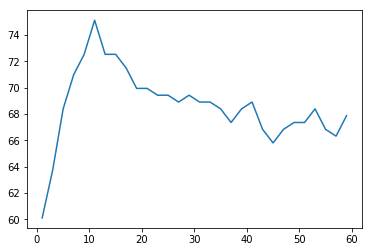

In [12]:
#Determine the best value for k
trainAccuracies = []
numKValues = 30
for i in range(numKValues):
    acc =accuracy(trainingSet,features,2*i+1)
    trainAccuracies.append(acc)
xAxis = ([2*i+1 for i in range(numKValues)])
plt.plot(xAxis,trainAccuracies)
plt.show()



Using the previous information about overfitting and underfitting, explain the shape of the graph! Why is the accuracy low for $k=1$ and as $k$ increases past $15$?

In [13]:
#Determine best value for k
optimalK=xAxis[np.argmax(trainAccuracies)]

#Best kNN was found with k=11
print("Best k:",optimalK)

#Determine validation error with this value for k
optimalKNNVal = accuracy(validationSet,features,optimalK)
print("Test Accuracy:",optimalKNNVal)


Best k: 11
Test Accuracy: 71.42857142857143


Why is the accuracy for the validation set lower than the training accuracy (about $75\%$)?

## Bias and Variance in $k$-Nearest Neighbors

Let's investigate bias and variance in terms of kNN. A great dataset is the iris dataset, which contains three classes of irises and $50$ examples of each. The data set contains sepal and petal length and width. For the sake of clarity, I add some noise to the iris data so that the decision boundaries are not as clear.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

np.random.seed(189)

#From http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
X = X + 0.3*np.random.randn(X.shape[0], X.shape[1])
y[:] = iris.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



n_neighbors = 1
weights ='uniform'


def kNNForIris(num_neighbors,X,y,mweights = "uniform"):
    plt.figure(figsize = (7,7))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # we create an instance of Neighbours Classifier and fit the data.

    clf = neighbors.KNeighborsClassifier(num_neighbors, weights=weights)
    
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (num_neighbors, weights))
    plt.show()
    print("Training Accuracy: %.3f"%(clf.score(X,y)))

def determineError(X,Y,yTitle="Training Accuracy"):
    plt.figure(figsize = (7,7))

        
    errors = []
    for num_neighbors in range(1,trainX.shape[0]):
        clf = neighbors.KNeighborsClassifier(num_neighbors, weights=weights)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        clf.fit(X,Y)

        error = clf.score(X,Y)
        errors.append(error)
    
    plt.plot(errors)
    plt.ylabel(yTitle)
    plt.xlabel('k Value')
    plt.show()
    return errors

NameError: name 'y' is not defined

## Test Different Values of k

In [21]:
kNNForIris(1,X,y)
kNNForIris(6,X,y)
kNNForIris(50,X,y)

NameError: name 'kNNForIris' is not defined

## Decision boundaries in $k$-Nearest Neighbors

The plots above have red, green, and blue colored sections corresponding to **decision boundaries**. Decision boundaries are the boundaries in which a specific classication decision is chosen. For example, the red section represents the area where a new point would be classified as red, and similarly for blue and green. The decision boundary is the dividing line between the red and green sections. When comparing $k=1$ and $k=50$, there are major differences in the decision boundary. For $k=1$, the decision boundary is not a smooth and contains many small "islands of classification". The decision boundary is very complex and attempts to fit specifically to each data point. This is not necessary the best choice. If we consider $k=50$, then the decision boundary is far mor simple. The decision boundary is roughly composed of straight lines, for example the green region is roughly triangular.

How do we bring bias and variance into these plots?

## Bias in kNN
The bias for kNN can be thought of classification accuracy. For small values of $k$, our model performs exceptionally on the training data. $k=1$ even does perfect classification! For large values of $k$, our models performs quite poorly, hardly better than random guessing. Thus bias increases as $k$ increases.

Below is a plot of the training accuracy using the the training data to create decision boundaries and predict. The bias increases (accuracy is the opposite of error).

In [22]:
errors = determineError(X,y)

NameError: name 'determineError' is not defined

## Variance in kNN
Variance for kNN is best understood through the decision boundaries. With the smaller values of $k$, the decision boundaries are jagged and complex, but simple and straight for larger values of $k$. Thus variance decreases as $k$ increases. 

Below is a gif of the decision boundaries evolving as $k$ increases.
<img src="knn.gif" width="60%">

# Bias Variance Tradeoff

We have seen that increasing $k$ increases the bias but decreases the variance. But we want both low bias and variance! How do we balance bias and variance? This is known as the bias variance tradeoff. 

![alt text](BiasVarianceTradeoff.png "Bias Variance Tradeoff")

Image from http://scott.fortmann-roe.com/docs/BiasVariance.html


The optimal model is one that minimizes the sum of the $\text{bias}^2$ and variance. This is usually determined through testing various values and selecting the best one. A key notion of the trade off is that a central value is the best choice. When generating a model, it may seem that it is best to always minimize bias, because on average our models will do well. This is incorrect as in practice we only have one model (more on this later in the notebook!) and we would like consistent and good results with this single model. Although on average we may have low error, if we only have one opportunity it is very important to sacrifice some error to have greater confidence in our model.

**Test for understanding**:
Where does underfitting and overfitting lie in the graph above? How do they relate to bias and variance?

# Ensemble Learning
One solution is **ensemble learning**! Ensemble learning relies on the notion of aggregating multiple models and using the average classification of those models. We could create multiple decision trees for iris classification and average the prediction overall of the trees and use that as our prediction. What happens when we use a lot of trees? We get **random forest**. However, if we just created a bunch of decision trees, we would get the same decision tree each time. What we can do is sample what datapoints we would like our decision tree to train on, and select which subset of features we would like our decision tree to utilize. 

<img src="RandomForest.png" width="60%">

Image from https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d